# ДЗ 4.

### Задача 1

Коробки с шоколадом упаковываются автоматически. Их средняя масса равна 1.06 кг. Известно, что 5% коробок имеют массу, меньшую 1 кг. Найдите: а) среднее квадратическое отклонение массы коробки, б) процент коробок, имеющих массу больше 1.1 кг.

Подсказка. 1. Можно считать, что распределение массы коробки нормальное. 2. Найдите такое значение scale, для которого значение cdf(x=1, loc=1.06, scale=scale) близко к 0.05. Точности 0.0001 будет достаточно.



Х - нормально распределенная случайная величина, равная массе коробки с конфетами.

a = 1.06 - мат. ожидание

sigma  - среднее квадратичное отклонение
$$F(x) = P(X < 1).$$
F(x) = 0.05
Используем функцию Лапласа

Ф((-1.06)/sigma) + 0.5 = 0.05

Ф(0.06/sigma) = 0.45

0.06/sigma = 1.645


In [51]:
sigma = 0.06/1.645
print(f'среднее квадратичное отклонение  {sigma}')

среднее квадратичное отклонение  0.0364741641337386


Вычислим процент коробок, имеющих массу больше 1.1 кг.
P(1.1 < X < бесконечность ) = Ф(бесконечность) - Ф((1.1 - 1.06)/sigma) = 0.5 - Ф(1.097) = 0.5 - 0.362 = 0.138


In [52]:
p = (0.5 - 0.362) * 100
print(f'процент коробок, имеющих массу больше 1.1 кг равен {p} процентов' )

процент коробок, имеющих массу больше 1.1 кг равен 13.8 процентов


### Задача 2

Коробка содержит 30 конфет. Известно, что масса каждой конфеты распределена равномерно в промежутке от 12 до 14 граммов. Используя центральную предельную теорему, найти вероятность, что масса всей коробки будет: а) меньше 390 граммов, б) больше 395 граммов, в) от 380 до 400 граммов.

Массой самой коробки можно пренебречь.

Подсказка. Для равномерного распределения в промежутке [a, b]:
1. мат. ожидание равно (a + b) / 2,
2. дисперсия равна (b - a)^2 / 12.

In [53]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Непрерывная случайная величина X имеет равномерное распределение на отрезке [a,b], если на этом отрезке плотность распределения случайной величины постоянна, а вне его – равна нулю, т.е
Выборку из равномерного распределения можно получить с помощью функции uniform из модуля numpy.random. Построим выборку из равномерного распределения с параметрами  𝑎=12 ,  𝑏=14.

In [54]:
a = 12
b = 14
n = 30
samples = np.random.uniform(a, b, size=30)
print(samples)

[13.47893626 12.94299983 12.90955567 13.54987642 13.12503277 13.85504982
 13.95165436 12.5980085  12.43819255 12.39270765 13.63254951 12.02058001
 12.48605714 12.89322036 12.62591505 13.82769952 12.11145048 12.67123616
 13.18881095 13.8038989  12.4297653  12.31319138 13.57493499 13.70222644
 13.22357372 13.24218222 13.74684755 12.68479802 13.49462624 13.40274007]


In [55]:
# m = M(X)- мат. ожидание для равномерного распределения
# d = D(X) - дисперсия для равномерного распределения
m = (a + b) / 2
d = ((b - a) ** 2) / 12
skv = np.sqrt(d)
print(f'Мат. ожидание {m}')
print(f'дисперсия {d}')
print(f'среднее квадратическое отклонение {skv}')


Мат. ожидание 13.0
дисперсия 0.3333333333333333
среднее квадратическое отклонение 0.5773502691896257


In [56]:
#Посчитаем выборочное среднее от выборки:
samples.mean()


13.077277261556272

In [57]:
#Выборочная дисперсия (смещённая) от выборки:
samples.var()

0.3231688753494392

Центральная предельная теорема утверждает: чем больше  𝑛 , тем ближе распределение величины  𝑌  к нормальному распределению с параметрами

𝑎=𝑛⋅𝑀(𝑋), 𝜎2=𝑛⋅𝐷(𝑋).

In [58]:
#Найдем параметры:
mu = n * m
sigma = n * d
print(mu)
print(sigma)

390.0
10.0


Что делать дальше я честно говоря не поняла.

In [59]:
# empirical distribution function

def edf(samples, x):
    return samples[samples < x].shape[0] / samples.shape[0]

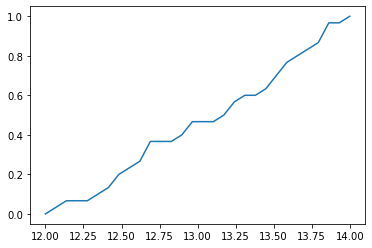

In [60]:
#Построим эмпирическую функцию распределения.
ox = np.linspace(12, 14, 30)
oy = np.array([edf(samples=samples, x=x) for x in ox])

plt.plot(ox, oy)

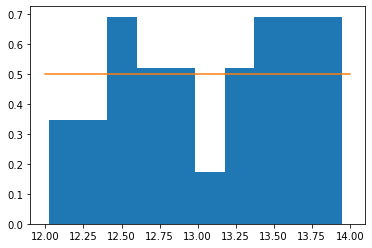

In [61]:
#Построим гистограмму, чтобы визуализировать функцию плотности. Вместе с ней построим теоретическую функцию плотности.
def pdf_uniform(a, b, x):
    return 1 / (b - a) if a <= x <= b else 0
oy = np.array([pdf_uniform(a, b, x) for x in ox])

plt.hist(samples, density=True)
plt.plot(ox, oy)

### Задача 3

Продемонстрируйте действие центральной предельной теоремы на каком-нибудь распределении на ваш выбор (кроме нормального). Что для этого нужно сделать:
1. Выберите несколько значений n (например, 2, 5, 10, 50).
2. Для выбранного значения n сгенерируйте 1000 раз выборку размера n из выбранного вами распределения, посчитайте по этой выборке выборочное среднее.
3. Изобразите гистограмму из полученных 1000 значений выборочного среднего с аргументом density=True.
4. Поверх гистограммы нарисуйте функцию плотности нормального распределения с параметрами из ЦПТ (т.е. mu = M, sigma^2 = D / n, где M - мат. ожидание выбранного вами распределения, D - его дисперсия).

При достаточно большом n гистограмма должна соответствовать построенной функции плотности.

Проверим утверждение центральной предельной теоремы на равномерном распределении  𝑋  с параметрами  𝑎=-5 ,  𝑏=5 . Для этого при различных  𝑛  сформируем  𝑛  выборок размера 1000 , а затем посчитаем от них поэлементно среднее. Таким образом, мы получим одну выборку размера  1000


In [66]:
a = -5
b = 5

m = (a + b) / 2
d = ((b - a) ** 2) / 12

n_samples = 1000

In [67]:
def get_mean_samples_uniform(n):
    samples = np.random.uniform(a, b, size=(n, n_samples))
    
    return samples.mean(axis=0)

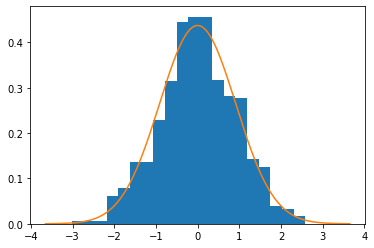

In [68]:
def pdf_normal(loc, scale, x):
    return np.exp(- ((x - loc) ** 2) / (2 * scale ** 2)) / (scale * np.sqrt(2 * np.pi))

n = 10

loc = m
scale = np.sqrt(d / n)
samples = get_mean_samples_uniform(n)

ox = np.linspace(loc - 4 * scale, loc + 4 * scale, 1000)
oy = np.array([pdf_normal(loc, scale, x) for x in ox])

plt.hist(samples, density=True, bins=20)
plt.plot(ox, oy)